In [1]:
# import libraries
import numpy as np
import cv2
import matplotlib.pyplot as plt
import utils
import tensorflow as tf

In [7]:
# from tensorflow.compat.v1 import ConfigProto
# from tensorflow.compat.v1 import InteractiveSession

# config = ConfigProto()
# config.gpu_options.allow_growth = True
# session = InteractiveSession(config=config)

In [2]:
# read images
X_plane = cv2.imread('Plane.jpg', cv2.IMREAD_GRAYSCALE)
X_img1 = cv2.imread('img1.jpg', cv2.IMREAD_GRAYSCALE)
X_img2 = cv2.imread('img2.jpg', cv2.IMREAD_GRAYSCALE)
X_img3 = cv2.imread('img3.jpg', cv2.IMREAD_GRAYSCALE)
X_img4 = cv2.imread('img4.jpg', cv2.IMREAD_GRAYSCALE)

In [3]:
# HE transform 
HE_plane = utils.HE(X_plane)
HE_img1 = utils.HE(X_img1)
HE_img2 = utils.HE(X_img2)
HE_img3 = utils.HE(X_img3)
HE_img4 = utils.HE(X_img4)

In [4]:
# AHE transform (0.5)
ADE_plane = utils.AHE(X_plane, 0.5)
ADE_img1 = utils.AHE(X_img1, 0.5)
ADE_img2 = utils.AHE(X_img2, 0.5)
ADE_img3 = utils.AHE(X_img3, 0.5)
ADE_img4 = utils.AHE(X_img4, 0.5)

In [5]:
# load model
model_cdf = tf.keras.models.load_model('saved_models/model2')
model_cdf.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 120, 1)]     0         
_________________________________________________________________
lambda (Lambda)              (None, 120, 120, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 120, 16)      160       
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 120, 16)      64        
_________________________________________________________________
re_lu (ReLU)                 (None, 120, 120, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        4640  

In [6]:
model_2dhe_cdf = tf.keras.models.load_model('saved_models/model_2dhe')
model_2dhe_cdf.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 120, 120, 1)]     0         
_________________________________________________________________
lambda (Lambda)              (None, 120, 120, 1)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 120, 120, 16)      160       
_________________________________________________________________
batch_normalization (BatchNo (None, 120, 120, 16)      64        
_________________________________________________________________
re_lu (ReLU)                 (None, 120, 120, 16)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 30, 30, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        4640  

In [7]:
# CNN transform:
#    1) load model
#    2) preprocess and CNN output
#    3) post process
#    4) apply cdf to image

cnn_plane_cdf = utils.predict(X_plane, model_cdf)
CNN_plane = utils.apply_cdf(X_plane, cnn_plane_cdf)

cnn_img1_cdf = utils.predict(X_img1, model_cdf)
CNN_img1 = utils.apply_cdf(X_img1, cnn_img1_cdf)

cnn_img2_cdf = utils.predict(X_img2, model_cdf)
CNN_img2 = utils.apply_cdf(X_img2, cnn_img2_cdf)

cnn_img3_cdf = utils.predict(X_img3, model_cdf)
CNN_img3 = utils.apply_cdf(X_img3, cnn_img3_cdf)

cnn_img4_cdf = utils.predict(X_img4, model_cdf)
CNN_img4 = utils.apply_cdf(X_img4, cnn_img4_cdf)

In [8]:
# 2DHE transform
#    1) compute 2D histogram of image
#    2) HE 
_2dh_plane = utils.im2dhist(X_plane,w_neighboring=3)
_2DHE_plane = utils.im2dhisteq(X_plane, _2dh_plane)

_2dh_img1 = utils.im2dhist(X_img1, w_neighboring=3)
_2DHE_img1 = utils.im2dhisteq(X_img1, _2dh_img1)

_2dh_img2 = utils.im2dhist(X_img2, w_neighboring=3)
_2DHE_img2 = utils.im2dhisteq(X_img2, _2dh_img2)

_2dh_img3 = utils.im2dhist(X_img3, w_neighboring=3)
_2DHE_img3 = utils.im2dhisteq(X_img3, _2dh_img3)

_2dh_img4 = utils.im2dhist(X_img4, w_neighboring=3)
_2DHE_img4 = utils.im2dhisteq(X_img4, _2dh_img4)

KeyboardInterrupt: 

In [10]:
# CNN transform:
#    1) load model
#    2) preprocess and CNN output
#    3) post process
#    4) apply cdf to image

cnn_plane_2dhe_cdf = utils.predict_2dhe(X_plane, model_2dhe_cdf)
CNN_plane_2dhe = utils.apply_cdf(X_plane, cnn_plane_2dhe_cdf)

cnn_img1_2dhe_cdf = utils.predict_2dhe(X_img1, model_2dhe_cdf)
CNN_img1_2dhe = utils.apply_cdf(X_img1, cnn_img1_2dhe_cdf)

cnn_img2_2dhe_cdf = utils.predict_2dhe(X_img2, model_2dhe_cdf)
CNN_img2_2dhe = utils.apply_cdf(X_img2, cnn_img2_2dhe_cdf)

cnn_img3_2dhe_cdf = utils.predict_2dhe(X_img3, model_2dhe_cdf)
CNN_img3_2dhe = utils.apply_cdf(X_img3, cnn_img3_2dhe_cdf)

cnn_img4_2dhe_cdf = utils.predict_2dhe(X_img4, model_2dhe_cdf)
CNN_img4_2dhe = utils.apply_cdf(X_img4, cnn_img4_2dhe_cdf)

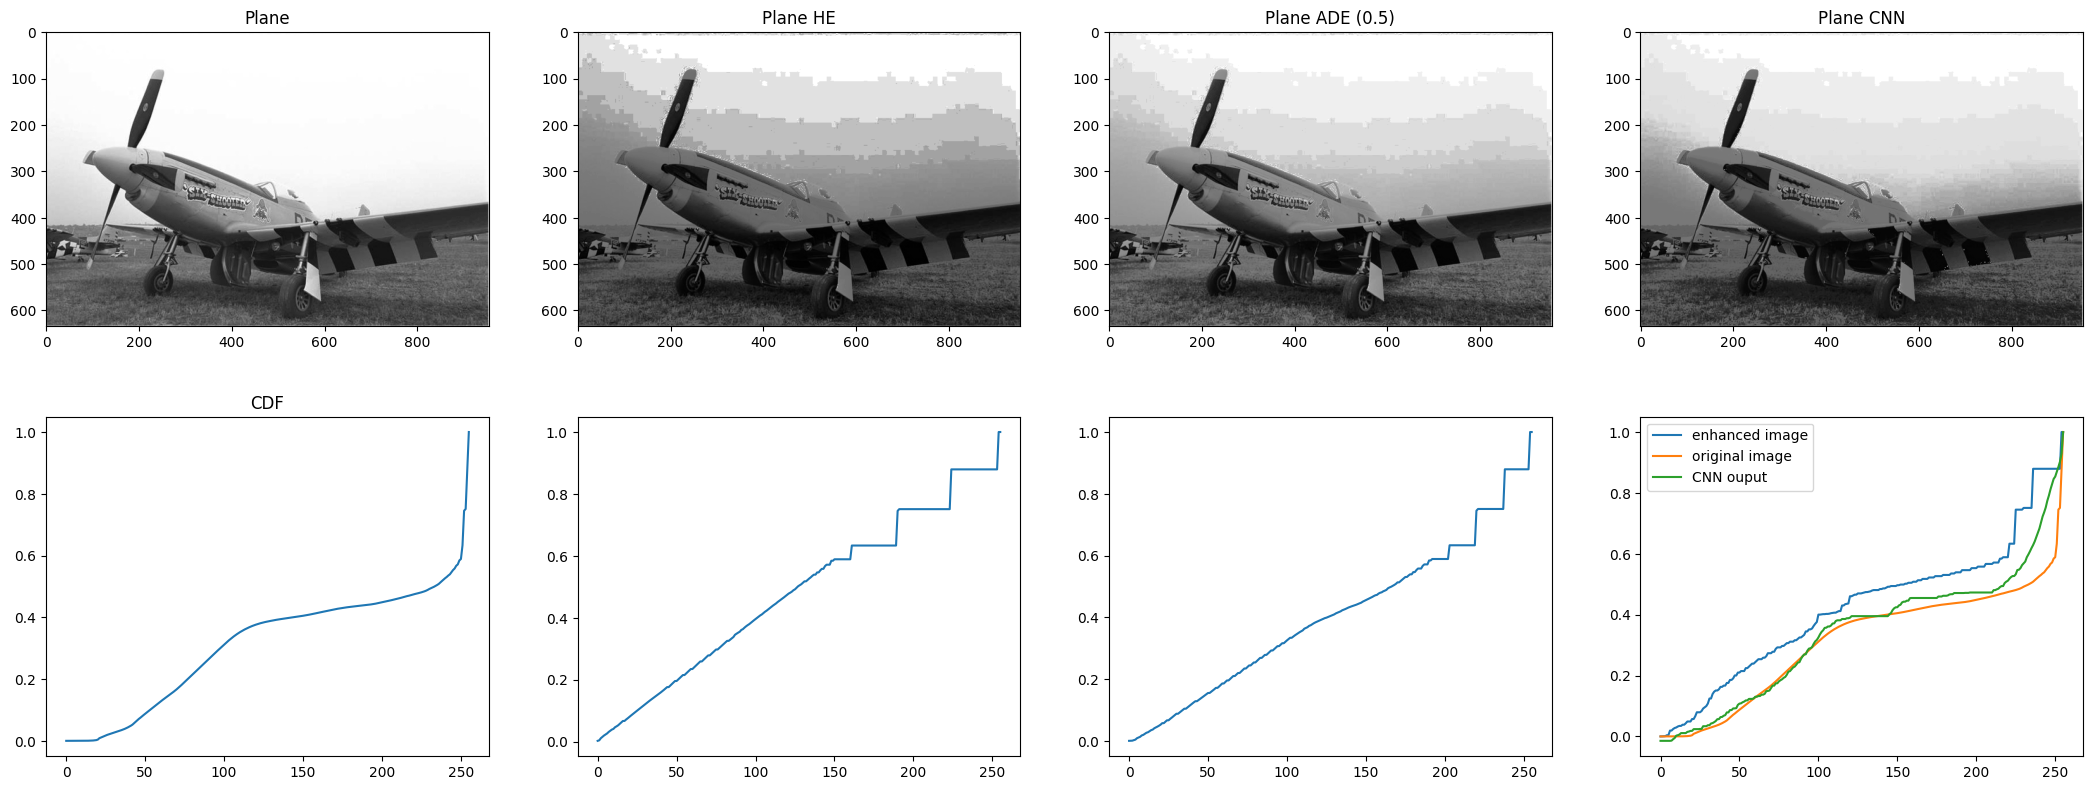

In [10]:
# report 
fig = plt.figure(figsize=(40,15))

plt.subplot(3,6,1)
plt.imshow(X_plane, cmap='gray')
plt.title('Plane')

plt.subplot(3,6,2)
plt.imshow(HE_plane, cmap='gray')
plt.title('Plane HE')

plt.subplot(3,6,3)
plt.imshow(ADE_plane, cmap='gray')
plt.title('Plane ADE (0.5)')

plt.subplot(3,6,4)
plt.imshow(CNN_plane, cmap='gray')
plt.title('Plane CNN')

# plt.subplot(3,6,5)
# plt.imshow(_2DHE_plane, cmap='gray')
# plt.title('Plane 2DHE (w = 3)')

# plt.subplot(3,6,6)
# plt.imshow(CNN_plane_2dhe, cmap='gray')
# plt.title('CNN Plane 2DHE (w = 3)')

plt.subplot(3,6,7)
plt.plot(utils.calc_cdf(X_plane))
plt.title('CDF')

plt.subplot(3,6,8)
plt.plot(utils.calc_cdf(HE_plane))


plt.subplot(3,6,9)
plt.plot(utils.calc_cdf(ADE_plane))


plt.subplot(3,6,10)
plt.plot(utils.calc_cdf(CNN_plane), label='enhanced image')
plt.plot(utils.calc_cdf(X_plane), label='original image')
plt.plot(cnn_plane_cdf, label='CNN ouput')
plt.legend()

# plt.subplot(3,6,11)
# plt.plot(utils.calc_cdf(_2DHE_plane))

# plt.subplot(3,6,12)
# plt.plot(utils.calc_cdf(CNN_plane_2dhe), label='enhanced image')
# plt.plot(utils.calc_cdf(X_plane), label='original image')
# plt.plot(cnn_plane_2dhe_cdf, label='CNN ouput')
# plt.legend()

# plt.subplot(3,6,17)
# plt.plot(utils.get_map_2dhe(_2DHE_plane, _2dh_plane))
# plt.title('plane x to y map')



plt.show()

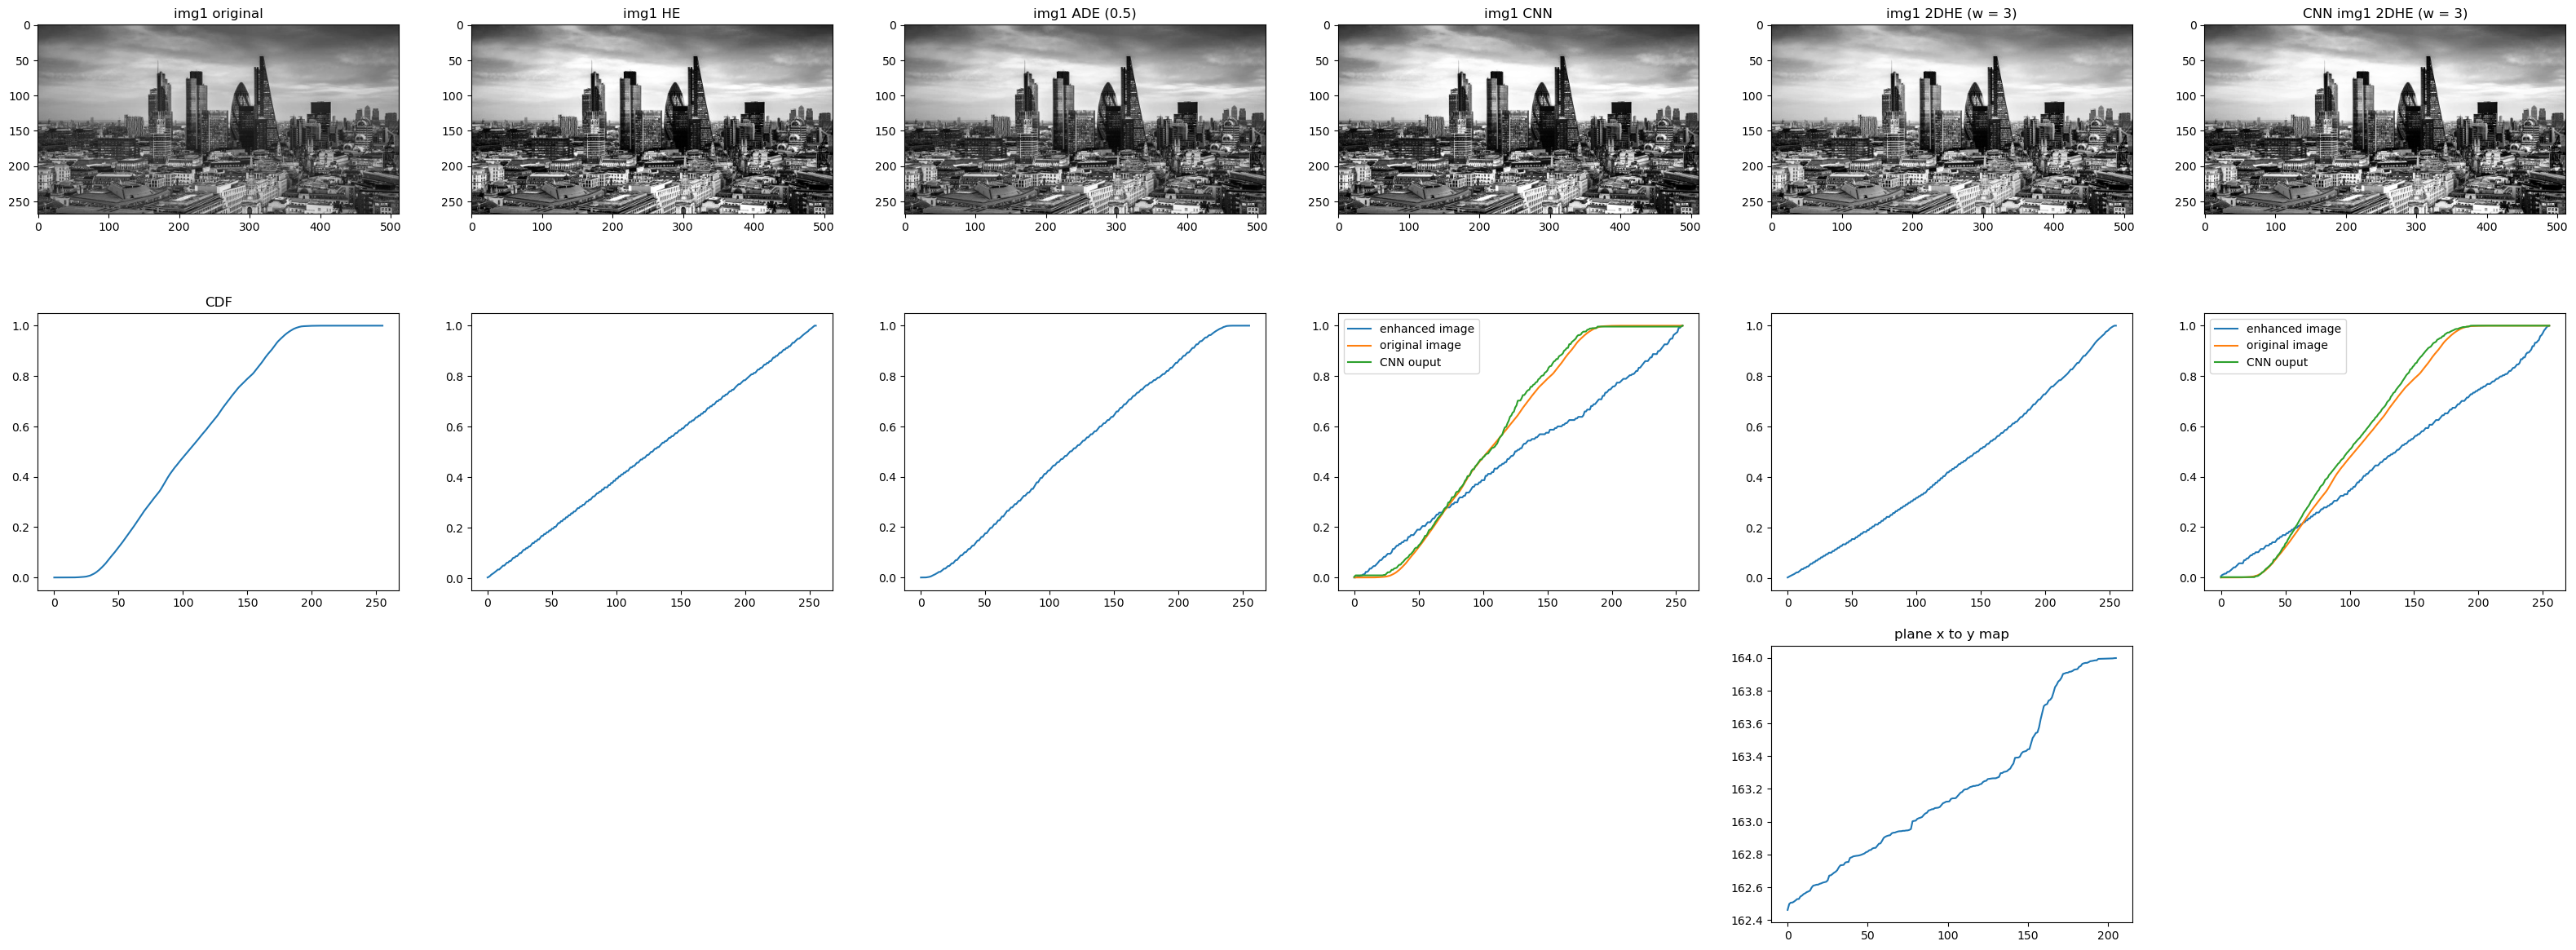

In [12]:
# report 
fig = plt.figure(figsize=(40,15))

plt.subplot(3,6,1)
plt.imshow(X_img1, cmap='gray')
plt.title('img1 original')

plt.subplot(3,6,2)
plt.imshow(HE_img1, cmap='gray')
plt.title('img1 HE')

plt.subplot(3,6,3)
plt.imshow(ADE_img1, cmap='gray')
plt.title('img1 ADE (0.5)')

plt.subplot(3,6,4)
plt.imshow(CNN_img1, cmap='gray')
plt.title('img1 CNN')

plt.subplot(3,6,5)
plt.imshow(_2DHE_img1, cmap='gray')
plt.title('img1 2DHE (w = 3)')

plt.subplot(3,6,6)
plt.imshow(CNN_img1_2dhe, cmap='gray')
plt.title('CNN img1 2DHE (w = 3)')

plt.subplot(3,6,7)
plt.plot(utils.calc_cdf(X_img1))
plt.title('CDF')

plt.subplot(3,6,8)
plt.plot(utils.calc_cdf(HE_img1))

plt.subplot(3,6,9)
plt.plot(utils.calc_cdf(ADE_img1))


plt.subplot(3,6,10)
plt.plot(utils.calc_cdf(CNN_img1), label='enhanced image')
plt.plot(utils.calc_cdf(X_img1), label='original image')
plt.plot(cnn_img1_cdf, label='CNN ouput')
plt.legend()

plt.subplot(3,6,11)
plt.plot(utils.calc_cdf(_2DHE_img1))

plt.subplot(3,6,12)
plt.plot(utils.calc_cdf(CNN_img1_2dhe), label='enhanced image')
plt.plot(utils.calc_cdf(X_img1), label='original image')
plt.plot(cnn_img1_2dhe_cdf, label='CNN ouput')
plt.legend()

plt.subplot(3,6,17)
plt.plot(utils.get_map_2dhe(_2DHE_img1, _2dh_img1))
plt.title('plane x to y map')


plt.show()

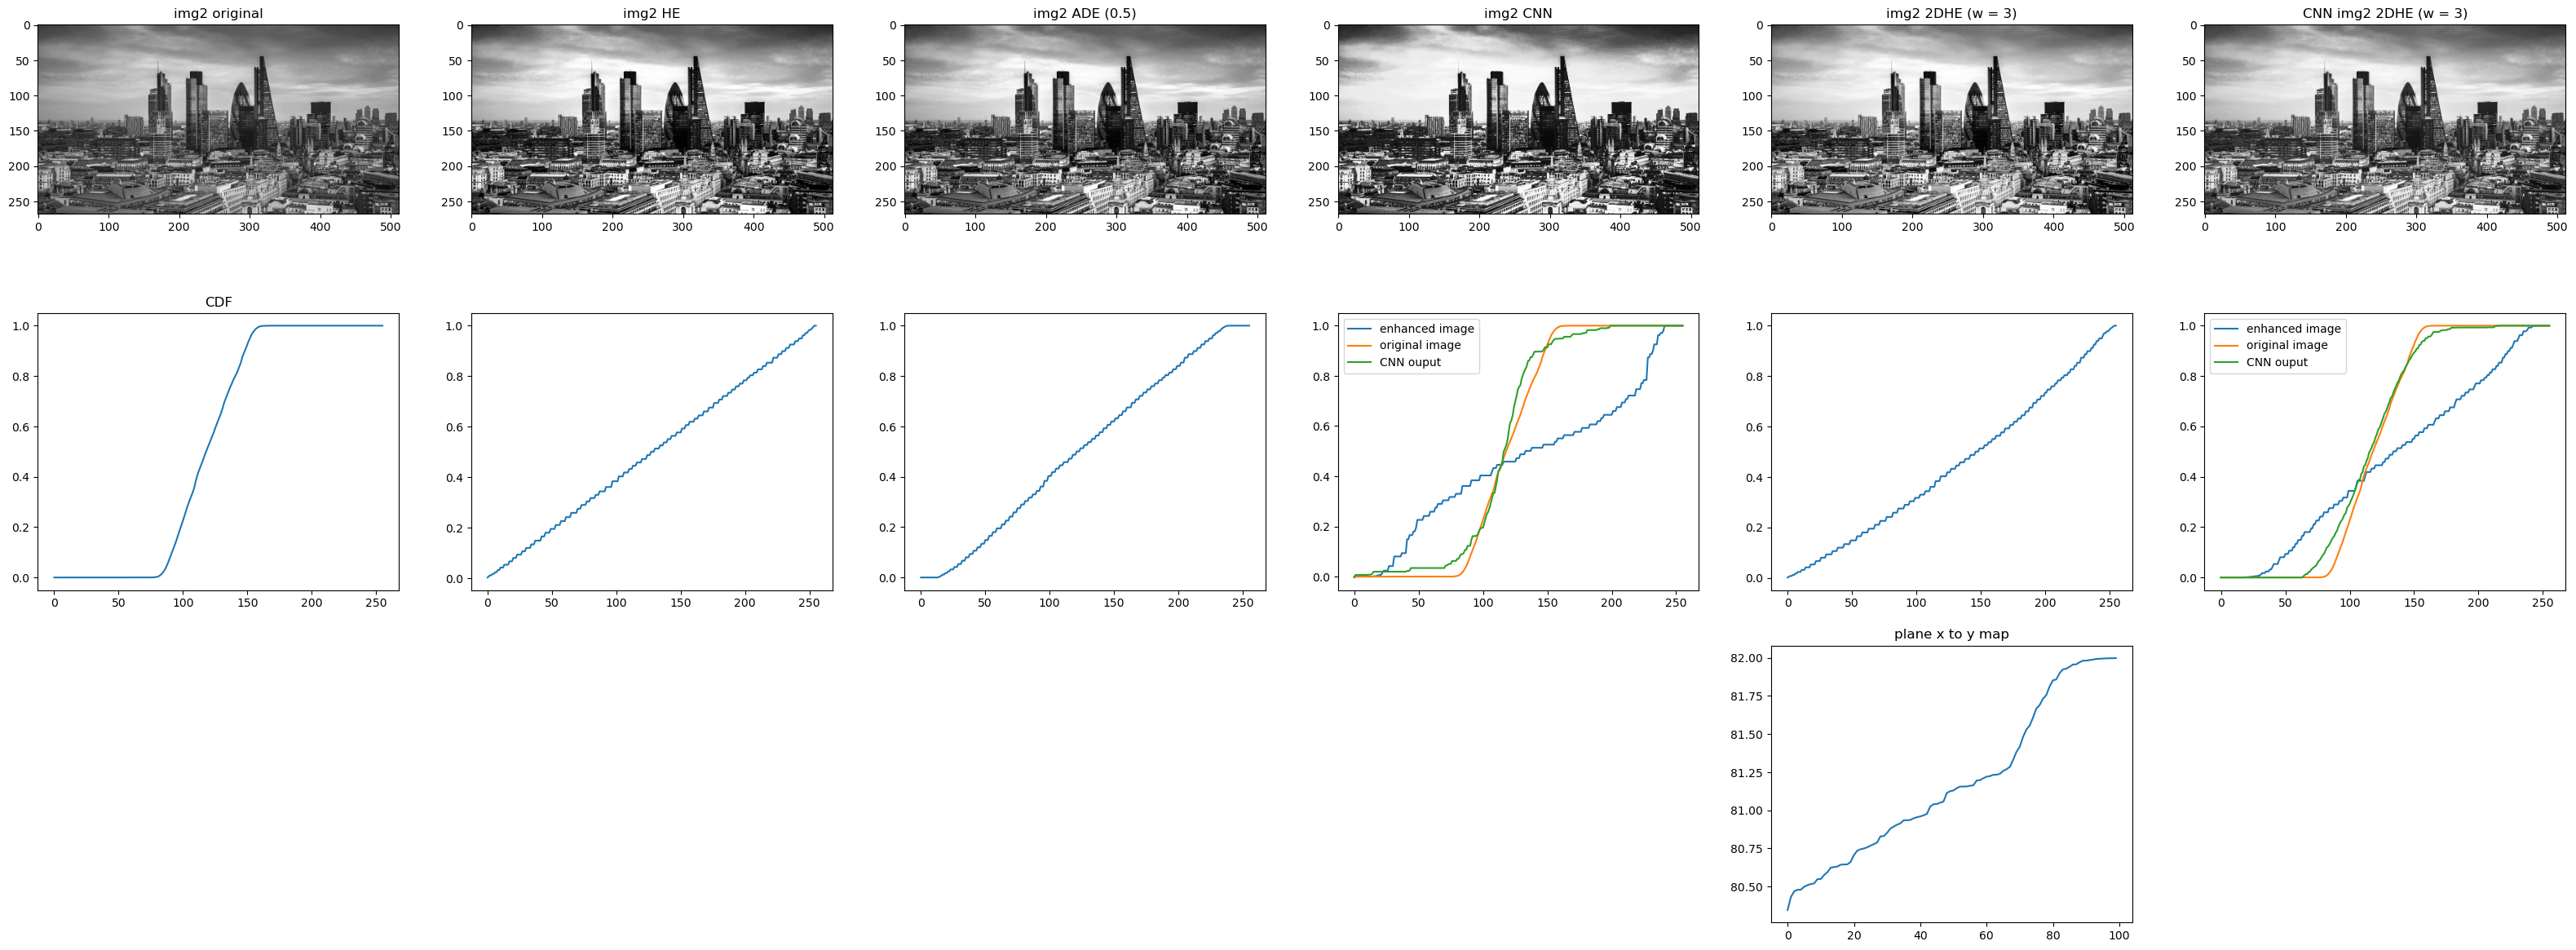

In [13]:
# report 
fig = plt.figure(figsize=(40,15))

plt.subplot(3,6,1)
plt.imshow(X_img2, cmap='gray')
plt.title('img2 original')

plt.subplot(3,6,2)
plt.imshow(HE_img2, cmap='gray')
plt.title('img2 HE')

plt.subplot(3,6,3)
plt.imshow(ADE_img2, cmap='gray')
plt.title('img2 ADE (0.5)')

plt.subplot(3,6,4)
plt.imshow(CNN_img2, cmap='gray')
plt.title('img2 CNN')

plt.subplot(3,6,5)
plt.imshow(_2DHE_img2, cmap='gray')
plt.title('img2 2DHE (w = 3)')

plt.subplot(3,6,6)
plt.imshow(CNN_img2_2dhe, cmap='gray')
plt.title('CNN img2 2DHE (w = 3)')

plt.subplot(3,6,7)
plt.plot(utils.calc_cdf(X_img2))
plt.title('CDF')

plt.subplot(3,6,8)
plt.plot(utils.calc_cdf(HE_img2))

plt.subplot(3,6,9)
plt.plot(utils.calc_cdf(ADE_img2))


plt.subplot(3,6,10)
plt.plot(utils.calc_cdf(CNN_img2), label='enhanced image')
plt.plot(utils.calc_cdf(X_img2), label='original image')
plt.plot(cnn_img2_cdf, label='CNN ouput')
plt.legend()

plt.subplot(3,6,11)
plt.plot(utils.calc_cdf(_2DHE_img2))

plt.subplot(3,6,12)
plt.plot(utils.calc_cdf(CNN_img2_2dhe), label='enhanced image')
plt.plot(utils.calc_cdf(X_img2), label='original image')
plt.plot(cnn_img2_2dhe_cdf, label='CNN ouput')
plt.legend()

plt.subplot(3,6,17)
plt.plot(utils.get_map_2dhe(_2DHE_img2, _2dh_img2))
plt.title('plane x to y map')


plt.show()

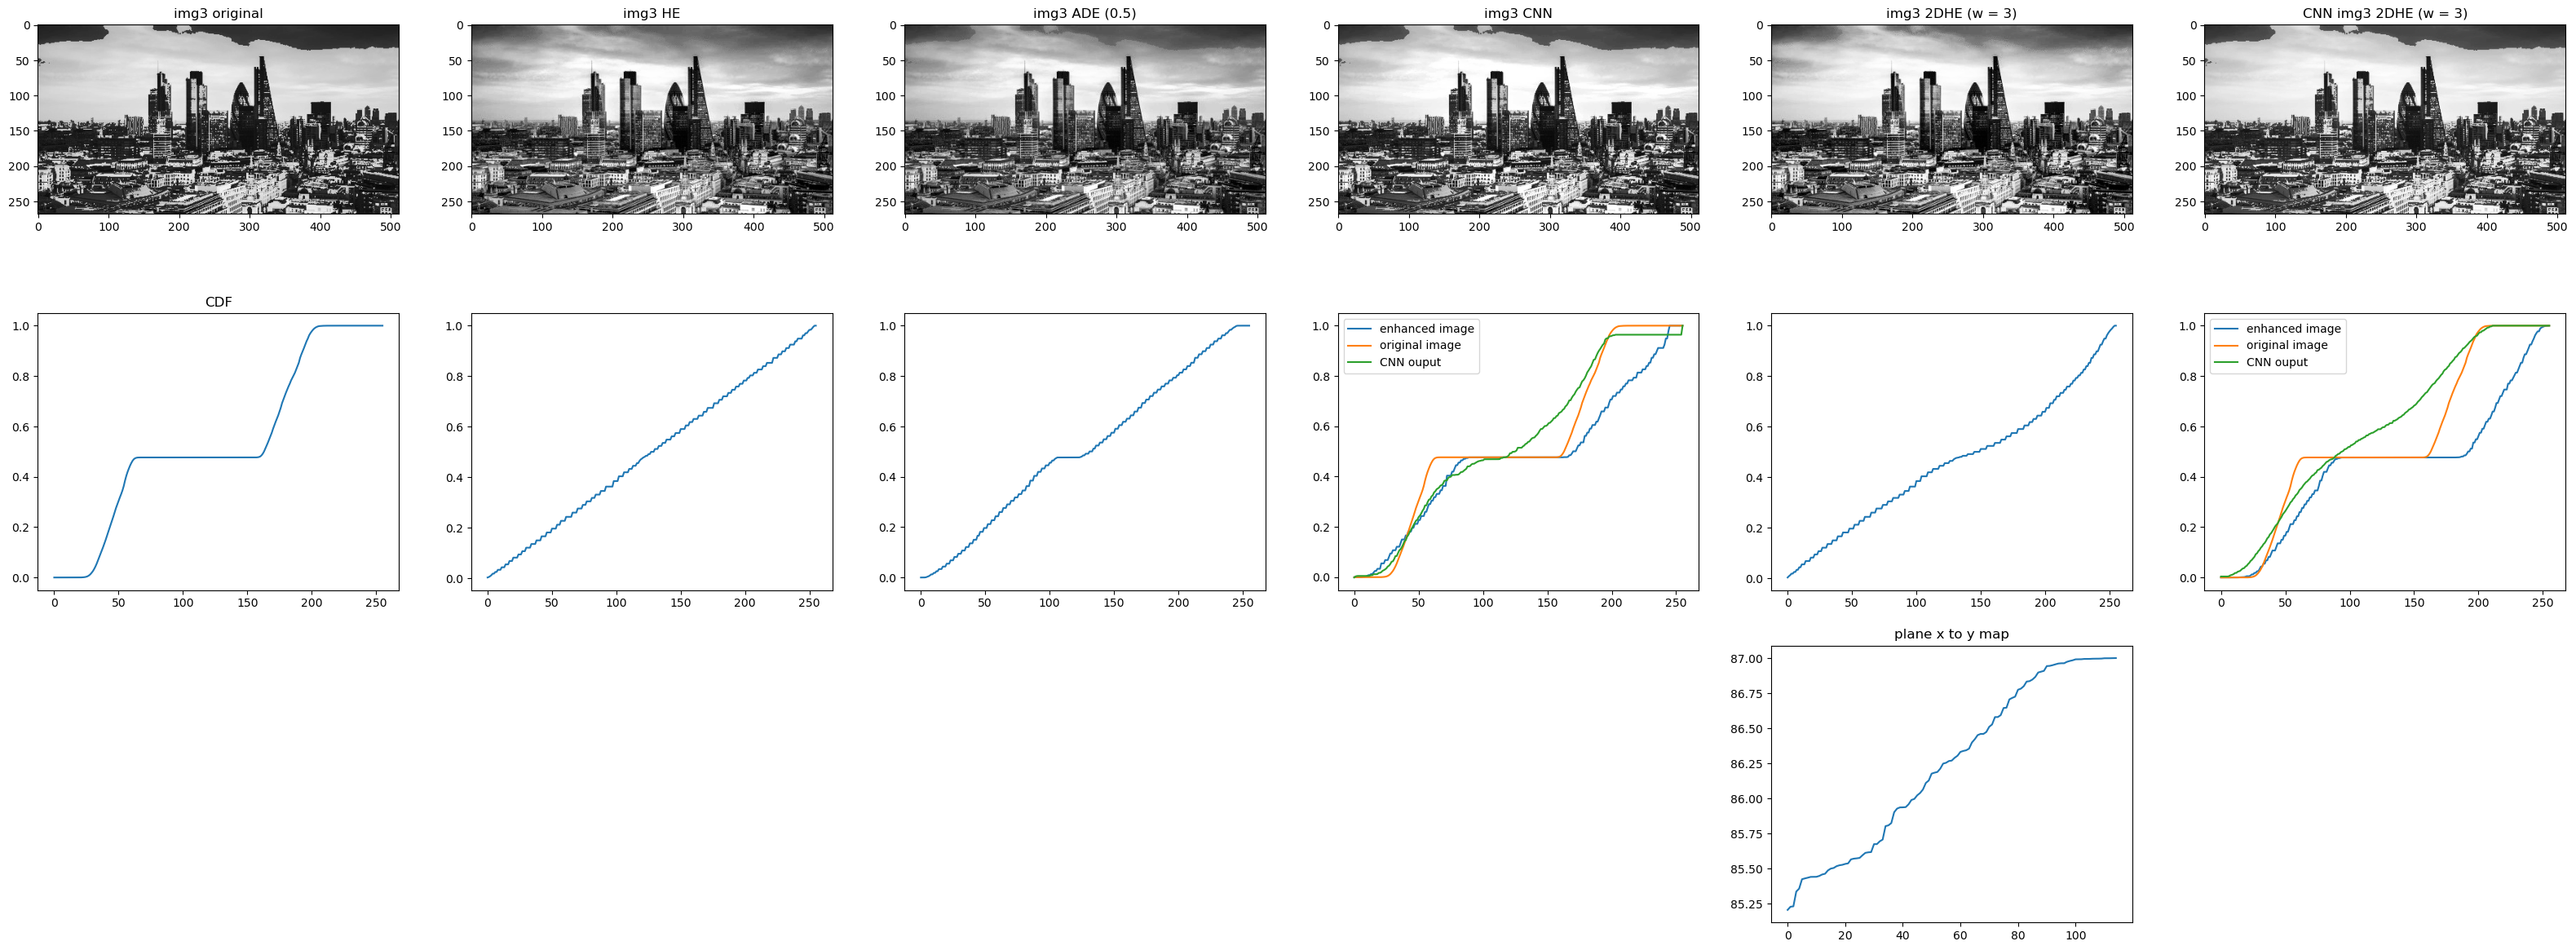

In [14]:
# report 
fig = plt.figure(figsize=(40,15))

plt.subplot(3,6,1)
plt.imshow(X_img3, cmap='gray')
plt.title('img3 original')

plt.subplot(3,6,2)
plt.imshow(HE_img3, cmap='gray')
plt.title('img3 HE')

plt.subplot(3,6,3)
plt.imshow(ADE_img3, cmap='gray')
plt.title('img3 ADE (0.5)')

plt.subplot(3,6,4)
plt.imshow(CNN_img3, cmap='gray')
plt.title('img3 CNN')

plt.subplot(3,6,5)
plt.imshow(_2DHE_img3, cmap='gray')
plt.title('img3 2DHE (w = 3)')

plt.subplot(3,6,6)
plt.imshow(CNN_img3_2dhe, cmap='gray')
plt.title('CNN img3 2DHE (w = 3)')

plt.subplot(3,6,7)
plt.plot(utils.calc_cdf(X_img3))
plt.title('CDF')

plt.subplot(3,6,8)
plt.plot(utils.calc_cdf(HE_img3))

plt.subplot(3,6,9)
plt.plot(utils.calc_cdf(ADE_img3))


plt.subplot(3,6,10)
plt.plot(utils.calc_cdf(CNN_img3), label='enhanced image')
plt.plot(utils.calc_cdf(X_img3), label='original image')
plt.plot(cnn_img3_cdf, label='CNN ouput')
plt.legend()

plt.subplot(3,6,11)
plt.plot(utils.calc_cdf(_2DHE_img3))

plt.subplot(3,6,12)
plt.plot(utils.calc_cdf(CNN_img3_2dhe), label='enhanced image')
plt.plot(utils.calc_cdf(X_img3), label='original image')
plt.plot(cnn_img3_2dhe_cdf, label='CNN ouput')
plt.legend()

plt.subplot(3,6,17)
plt.plot(utils.get_map_2dhe(_2DHE_img3, _2dh_img3))
plt.title('plane x to y map')


plt.show()

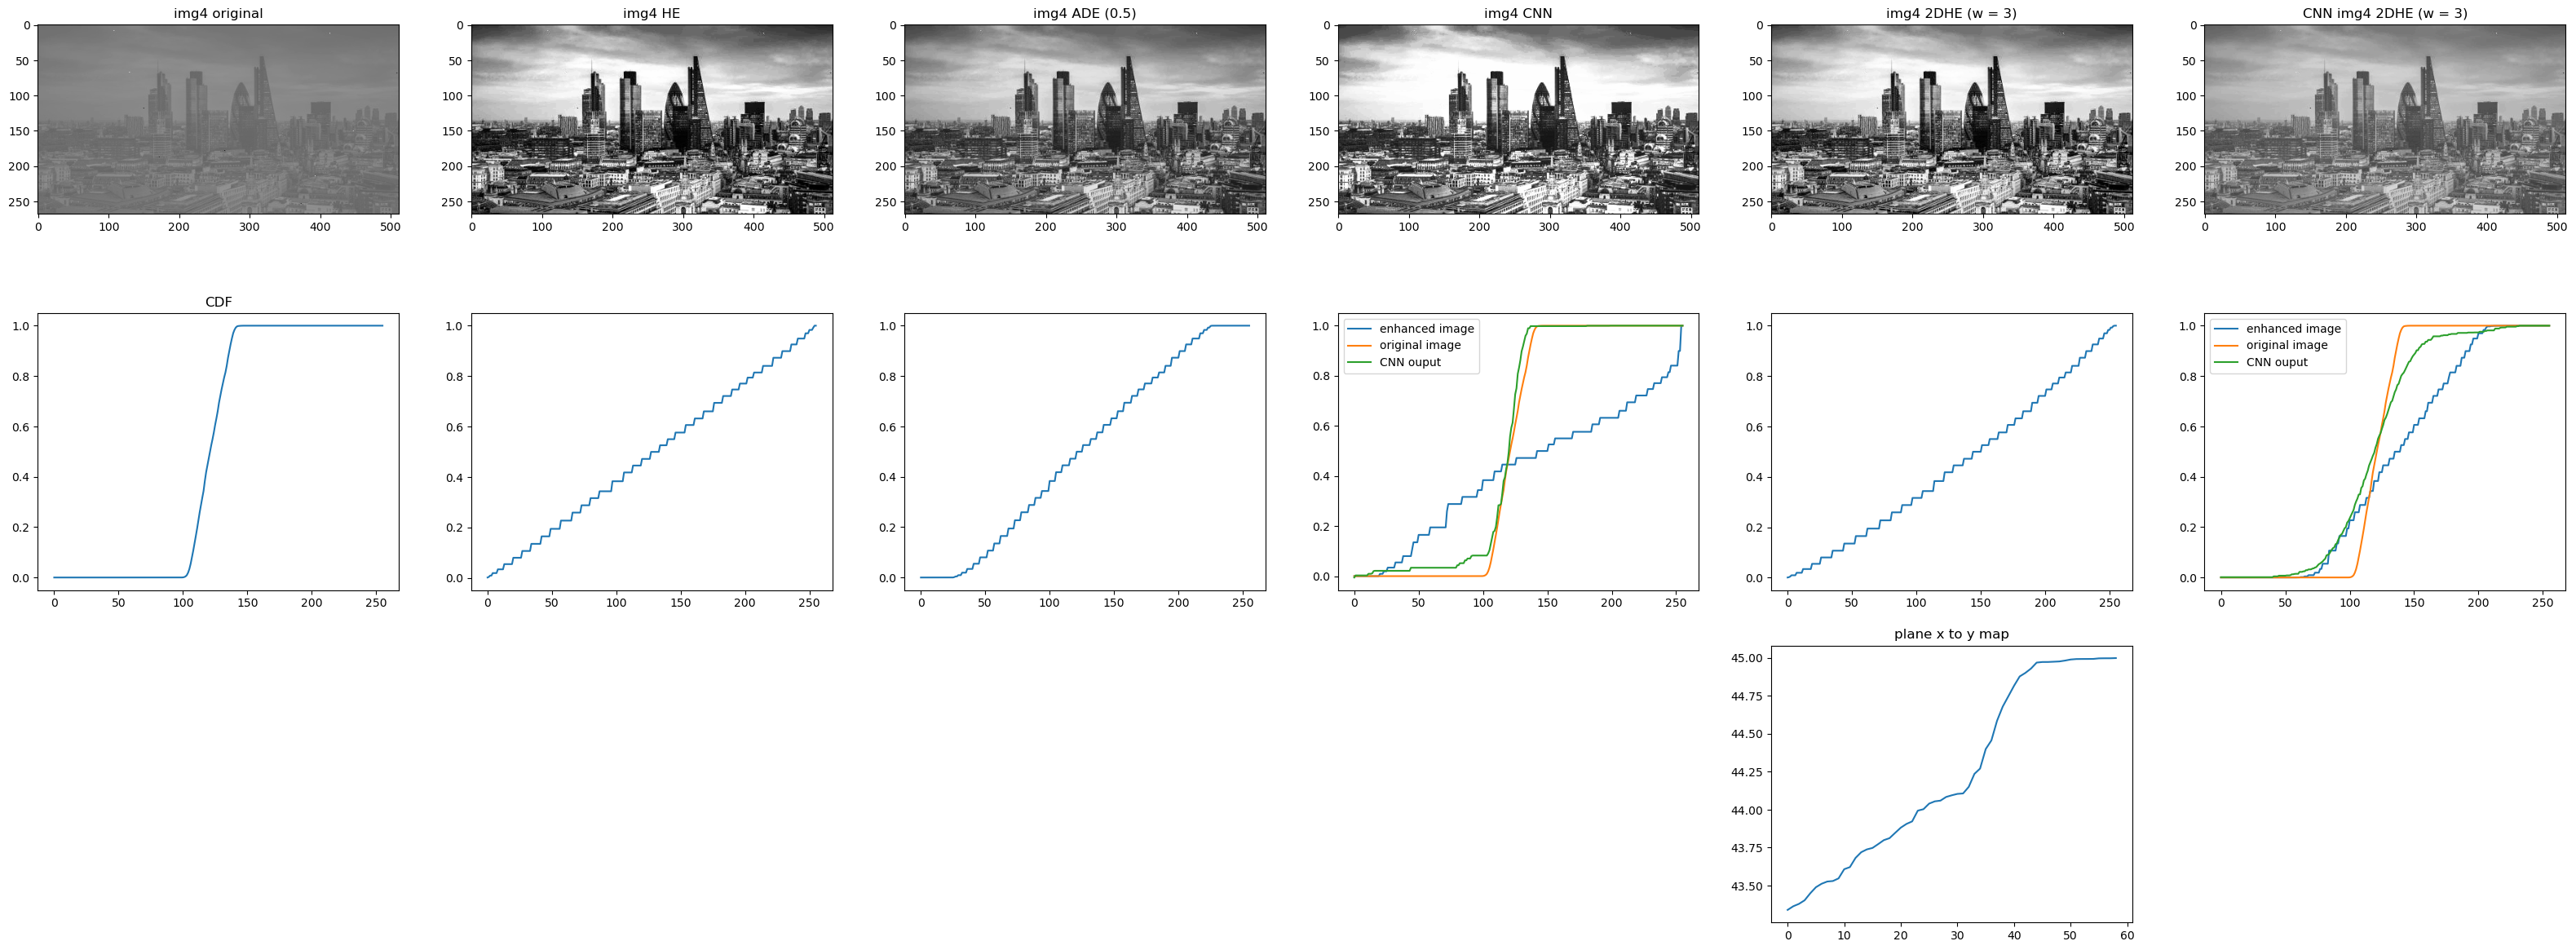

In [15]:
# report 
fig = plt.figure(figsize=(40,15))

plt.subplot(3,6,1)
plt.imshow(X_img4, cmap='gray')
plt.title('img4 original')

plt.subplot(3,6,2)
plt.imshow(HE_img4, cmap='gray')
plt.title('img4 HE')

plt.subplot(3,6,3)
plt.imshow(ADE_img4, cmap='gray')
plt.title('img4 ADE (0.5)')

plt.subplot(3,6,4)
plt.imshow(CNN_img4, cmap='gray')
plt.title('img4 CNN')

plt.subplot(3,6,5)
plt.imshow(_2DHE_img4, cmap='gray')
plt.title('img4 2DHE (w = 3)')

plt.subplot(3,6,6)
plt.imshow(CNN_img4_2dhe, cmap='gray')
plt.title('CNN img4 2DHE (w = 3)')

plt.subplot(3,6,7)
plt.plot(utils.calc_cdf(X_img4))
plt.title('CDF')

plt.subplot(3,6,8)
plt.plot(utils.calc_cdf(HE_img4))

plt.subplot(3,6,9)
plt.plot(utils.calc_cdf(ADE_img4))


plt.subplot(3,6,10)
plt.plot(utils.calc_cdf(CNN_img4), label='enhanced image')
plt.plot(utils.calc_cdf(X_img4), label='original image')
plt.plot(cnn_img4_cdf, label='CNN ouput')
plt.legend()

plt.subplot(3,6,11)
plt.plot(utils.calc_cdf(_2DHE_img4))

plt.subplot(3,6,12)
plt.plot(utils.calc_cdf(CNN_img4_2dhe), label='enhanced image')
plt.plot(utils.calc_cdf(X_img4), label='original image')
plt.plot(cnn_img4_2dhe_cdf, label='CNN ouput')
plt.legend()

plt.subplot(3,6,17)
plt.plot(utils.get_map_2dhe(_2DHE_img4, _2dh_img4))
plt.title('plane x to y map')


plt.show()